**<font color = 'blue' size = 38>UNSUPERVISED LEARNING</font>**

# <font color='Orange'>Clustering</font>

## <font color = 'Orange'>Preprocessing</font>


In [1]:
import numpy as np
# Let's begin by allocation 3 cluster's points
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

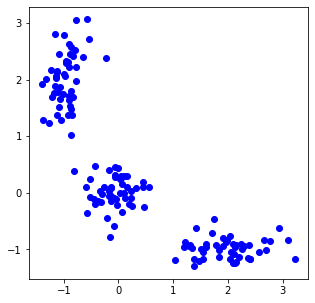

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

## <font color='Orange'>K-Means Clustering</font>

In [3]:
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

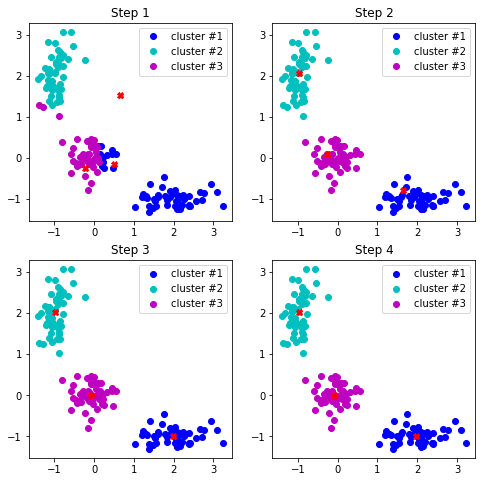

In [4]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)
# Let's plot K-means
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

## <font color='Orange'>Choosing the number of clusters for K-means</font>

In [5]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

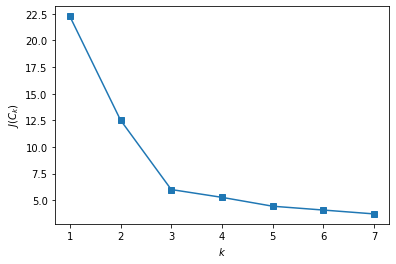

In [6]:
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

## <font color = 'Orange'>Agglomerative clustering</font>


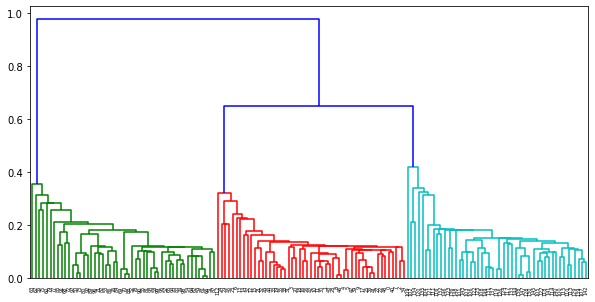

In [7]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

## <font color='Orange'>Comparison of clustering algorithms</font>

In [8]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering,DBSCAN


data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=10, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=10))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                                 average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative','DBSCAN'])

results

,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.668587,7.411565e-01,7.394638e-01,0.748061,7.437373e-01
Affinity,0.175174,6.124596e-01,9.589073e-01,0.486901,6.458574e-01
Spectral,0.756461,8.520396e-01,8.316906e-01,0.876614,8.535619e-01
Agglomerative,0.794003,8.668321e-01,8.575129e-01,0.879096,8.681701e-01
DBSCAN,0.000000,-7.965325e-17,3.616394e-17,1.000000,7.232789e-17


# <font color='Orange'>Advanced Clustering: Generate clusters for sentiment analysis of the bitcoin tweets</font>


## <font color = 'Orange'>Preprocessing</font>



In [10]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-09 Advanced Neural Networks & NLP/bitcointweets.csv")


In [11]:
df.columns = ['date','text','author','id','unknown','tags','url','sentiment']

In [12]:

df.head()

,date,text,author,id,unknown,tags,url,sentiment
0,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
1,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
2,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])

## <font color='Orange'>Universal Sentence Encoder</font>


In [14]:
pip install transformers

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 2.9MB 49.7MB/s 
     |████████████████████████████████| 890kB 56.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=2c1b9578b0c52258df8da61c0bf251df19f3595aa3c9c1bbb4d663222cb0bacc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [15]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [16]:
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df.text.values)

In [17]:
message_embeddings

<tf.Tensor: shape=(50858, 512), dtype=float32, numpy=
array([[-0.00023591, -0.04965301, -0.04544646, ..., -0.00699698,
        -0.0817619 , -0.06738111],
       [-0.00882477, -0.06427667, -0.06390411, ...,  0.05352813,
        -0.06909755, -0.0684047 ],
       [-0.0431166 , -0.07247733, -0.00263127, ..., -0.02413651,
        -0.04707826, -0.04411679],
       ...,
       [-0.03637778, -0.07333582, -0.02006673, ...,  0.00748273,
        -0.06006525, -0.06887389],
       [-0.01435389, -0.05010171,  0.00692283, ..., -0.01416572,
        -0.07574022, -0.07719907],
       [-0.00828402, -0.08008463, -0.033356  , ..., -0.01549361,
        -0.03189274, -0.02582981]], dtype=float32)>

## <font color='Orange'>K-Means Clustering</font>

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()



### <font color='Orange'>Visualization</font>

### <font color = 'Orange'>Dimensionality reduction</font>

In [19]:
from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(2)
 
#Transform the data
df_new = pca.fit_transform(data)

### <font color='Orange'>Cluster training</font>

In [20]:

#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_new)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

### <font color='Orange'>Visualization of the clusters</font>

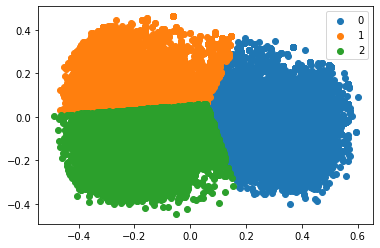

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

## <font color = 'Orange'> Agglomerative Clustering</font>

### <font color = 'Orange'>Dimensionality reduction</font>

In [22]:
from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(2)
 
#Transform the data
df_new = pca.fit_transform(data)

### <font color='Orange'>Cluster training</font>

In [23]:
from sklearn.cluster import AgglomerativeClustering


In [24]:
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(df_new, n_neighbors=10, include_self=False)

In [25]:
model = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(df_new)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 30 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


In [26]:
clusters = model.labels_.tolist()

In [27]:
model.labels_

array([2, 0, 2, ..., 0, 2, 0])

### <font color='Orange'>Visualization of the clusters</font>

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 30 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


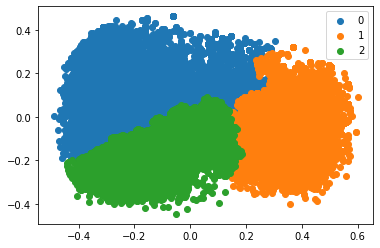

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = model.fit_predict(df_new)

u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

# <font color='Orange'>Deep Encoding for Categorical Data</font>

## <font color = 'Orange'>Preprocessing</font>
Link: https://www.kaggle.com/contactprad/bike-share-daily-data

In [29]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-11 Unsupervised Learning/bike_sharing_daily.csv')

In [30]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
data_small_df = df[['dteday','cnt','mnth']]


In [32]:
data_small_df.head()

,dteday,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


In [33]:
data_small_df = data_small_df.sort_values(by=['mnth','dteday'])
data_small_df.head()

,dteday,cnt,mnth
0,2011-01-01,985,1
1,2011-01-02,801,1
2,2011-01-03,1349,1
3,2011-01-04,1562,1
4,2011-01-05,1600,1


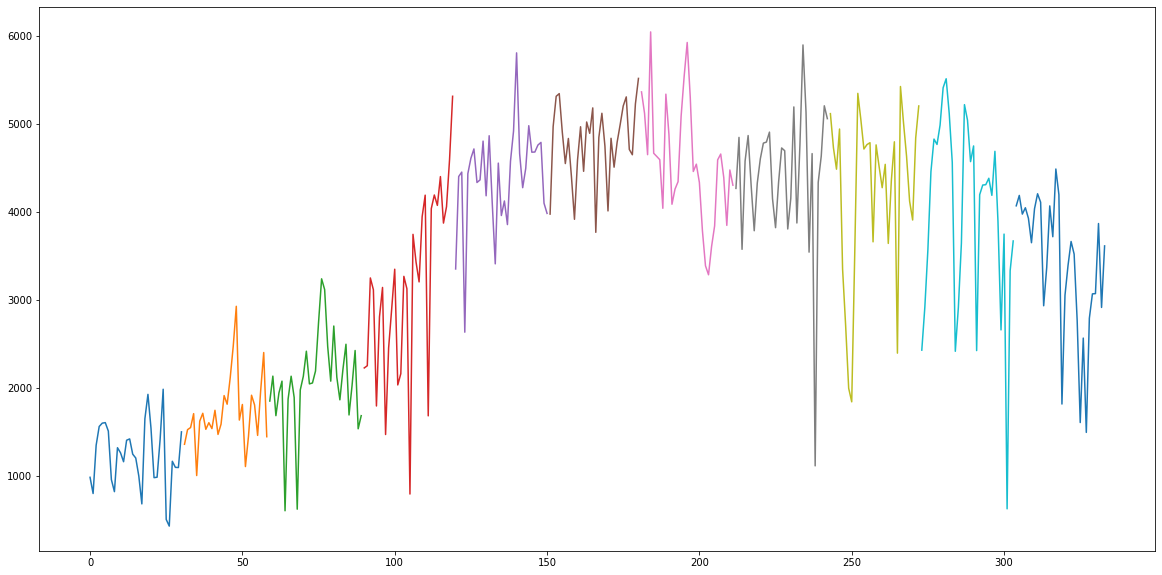

In [34]:
data_plot_2 = df[['dteday','cnt','mnth','yr']]
data_plot_2= data_plot_2[data_plot_2['yr']==0]

for x in range(1,12):
    data_plot_2[data_plot_2['mnth']==x]['cnt'].plot(figsize=(20,10))

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_small_df['cnt_Scaled'] = scaler.fit_transform(data_small_df[['cnt']])
data_small_df.head()

,dteday,cnt,mnth,cnt_Scaled
0,2011-01-01,985,1,0.110792
1,2011-01-02,801,1,0.089623
2,2011-01-03,1349,1,0.152669
3,2011-01-04,1562,1,0.177174
4,2011-01-05,1600,1,0.181546


## <font color = 'Orange'>Traditional Embeddings</font>

In [36]:
pd.get_dummies(data_small_df['mnth']).head() 

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


## <font color='Orange'>Deep Encoding</font>

In [37]:
data_small_df['mnth'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [38]:
data_small_df['mnth'] = data_small_df['mnth']-1
data_small_df['mnth'] = data_small_df['mnth'].astype(int)

## <font color = 'Orange'>Define Keras Model</font>

In [39]:
from keras.layers import Dense,Embedding, Flatten
from keras.models import Sequential
embedding_size = 3

model = Sequential()
model.add(Embedding(input_dim = 12, output_dim = 3, input_length = 1, name="embedding"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))



## <font color = 'Orange'>Compile Keras Model</font>

In [40]:
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])


## <font color = 'Orange'>Fit Keras Model</font>

In [41]:
model.fit(x = data_small_df['mnth'].values  , y=data_small_df['cnt_Scaled'].values   , epochs = 50, batch_size = 4)
  

Epoch 1/50
183/183 [==============================] - 1s 2ms/step - loss: 0.1366 - accuracy: 0.0000e+00
Epoch 2/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 2.6781e-04
Epoch 3/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 7.5773e-05
Epoch 4/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 7.3397e-04
Epoch 5/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 8.2545e-04
Epoch 6/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 1.8096e-04
Epoch 7/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 6.0160e-04
Epoch 8/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 3.9955e-04
Epoch 9/50
183/183 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.0011
Epoch 10/50
183/183 [==============================] - 0s 2ms/step -

## <font color='Orange'>Get Embeddings</font>

In [42]:
layer = model.get_layer('embedding')
output_embeddings = layer.get_weights()
output_embeddings

[array([[-0.17614704,  0.16229889, -0.2347006 ],
        [-0.22803721,  0.09690098, -0.09684622],
        [-0.03878833,  0.08660018, -0.02780341],
        [ 0.01174036, -0.01218022,  0.00739007],
        [ 0.10162964, -0.03873846,  0.10660165],
        [ 0.11935648, -0.09343165,  0.13187388],
        [ 0.08199301, -0.1174724 ,  0.10907275],
        [ 0.14905104, -0.07096808,  0.09094531],
        [ 0.07492573, -0.12413793,  0.13455138],
        [ 0.01806803, -0.09464914,  0.09111048],
        [ 0.00401454,  0.03082524, -0.00520097],
        [-0.09039115,  0.0468534 , -0.05964745]], dtype=float32)]

In [43]:
output_embeddings_df = pd.DataFrame(output_embeddings[0])
output_embeddings_df = output_embeddings_df.reset_index()
output_embeddings_df.columns = ['mnth', 'embedding_1', 'embedding_2', 'embedding_3']
output_embeddings_df

,mnth,embedding_1,embedding_2,embedding_3
0,0,-0.176147,0.162299,-0.234701
1,1,-0.228037,0.096901,-0.096846
2,2,-0.038788,0.086600,-0.027803
3,3,0.011740,-0.012180,0.007390
4,4,0.101630,-0.038738,0.106602
5,5,0.119356,-0.093432,0.131874
6,6,0.081993,-0.117472,0.109073
7,7,0.149051,-0.070968,0.090945
8,8,0.074926,-0.124138,0.134551
9,9,0.018068,-0.094649,0.091110


## <font color='Orange'> Visualization</font>

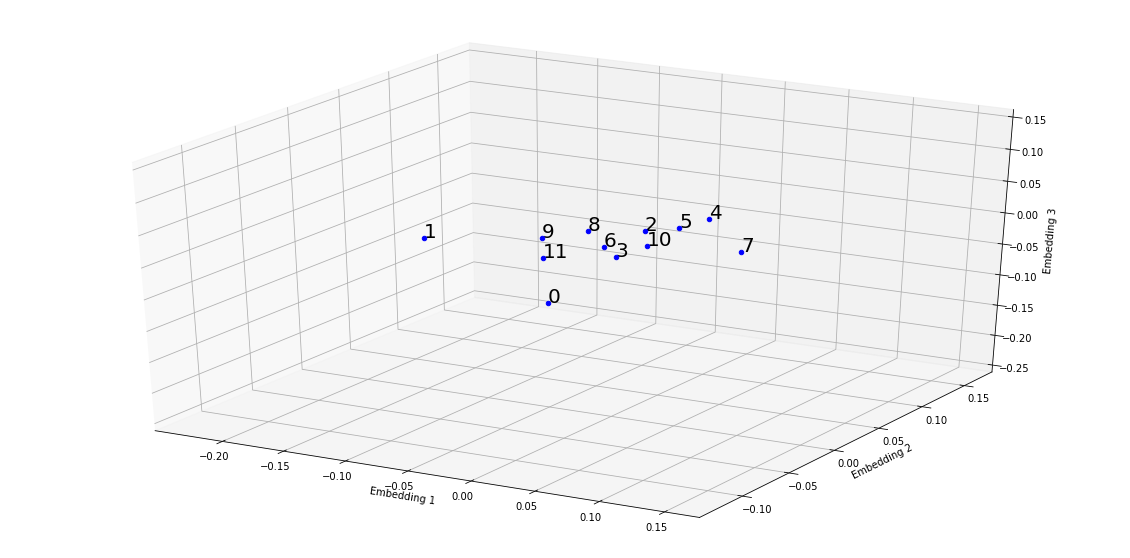

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

m = output_embeddings_df.iloc[:,1:].to_numpy()
labels = output_embeddings_df.iloc[:,0:1].to_numpy()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(labels)):
    ax.scatter(m[i,0],m[i,1],m[i,2], color='b')
    ax.text(m[i,0],m[i,1],m[i,2],'%s'%(str(labels[i][0])), size=20, zorder=1, color='k')

ax.set_xlabel('Embedding 1')  
ax.set_ylabel('Embedding 2')  
ax.set_zlabel('Embedding 3')  
plt.show()